<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Python%20SKLearn/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Iris Dataset from SKLearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.svm import SVC


In [3]:
iris = datasets.load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Select Setosa or Versicolor. Train SVM w/ Linear Kernel and no Regularization. i.e. C = infinity

In [5]:
X = iris.data[:, (2,3)] #extract petal width/length data
y = iris.target

setosa_or_versicolor = ( y == 0 ) | ( y == 1 )

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
svm_clf = SVC(C=float("inf"), kernel='linear')
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

Manually plot decision boundary before turning it into a function

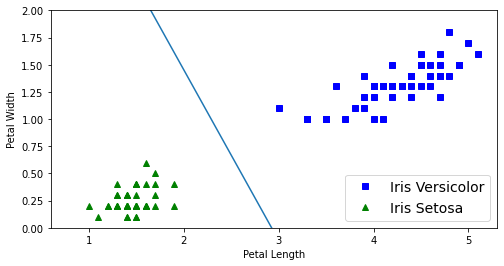

In [7]:
#the coeff property of the SVM has wieghts of each feature. 
#sigmoid(w0*x0 + w1*x1 * b) 
#thus at decision boundary, w0*x0 + w1*x1 * b = 0

b = svm_clf.intercept_[0]
w0 = svm_clf.coef_[0][0]
w1 = svm_clf.coef_[0][1]

left_right = np.array([0.1, 5.2])
up_down = -(w0*left_right + b)/w1

plt.figure(figsize=(8,4))

plt.plot(left_right, up_down)

plt.plot(X[y==1,0], X[y==1, 1], 'bs', label='Iris Versicolor')
plt.plot(X[y==0,0], X[y==0, 1], 'g^', label="Iris Setosa")

plt.ylabel("Petal Width")
plt.xlabel("Petal Length")
plt.axis([0.6, 5.3, 0, 2])
plt.legend(fontsize=14)

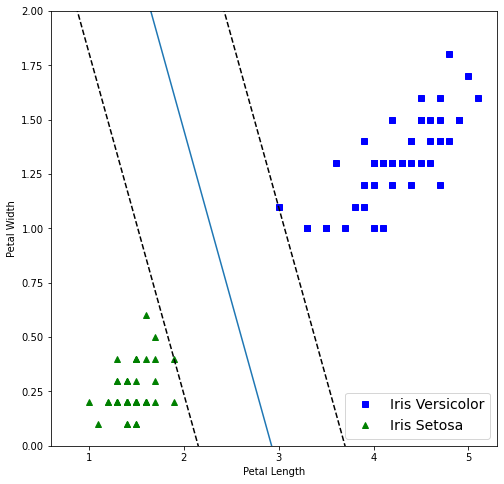

In [33]:
#define boundary plotting function

def plot_decision_boundary(svm_model, xmin, xmax):
  b = svm_model.intercept_[0]
  w = svm_model.coef_[0]
  w0 = w[0]
  w1 = w[1]

  left_right = np.array([xmin, xmax])
  decision_boundary = -(w0*left_right + b)/w1

  margin = 1/w1 #why? review equation
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin

  #plt.figure(figsize=(8,4))
  plt.plot(left_right, decision_boundary)
  plt.plot(left_right, gutter_up, 'k--')
  plt.plot(left_right, gutter_down, 'k--')

plt.figure(figsize=(8,8))
plt.plot(X[y==1,0], X[y==1, 1], 'bs', label='Iris Versicolor')
plt.plot(X[y==0,0], X[y==0, 1], 'g^', label="Iris Setosa")
plt.ylabel("Petal Width")
plt.xlabel("Petal Length")
plt.axis([0.6, 5.3, 0, 2])
plt.legend(fontsize=14)

#plt.scatter(svm_clf.support_vectors_[:,0], svm_clf.support_vectors_[:1], s=180)

plot_decision_boundary(svm_clf, .6, 5)

In [18]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

Show SVM sensitiivty to feature scaling

In [34]:
#use the following 4 point dataset
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [ ]:
#plot figures side by side

plt.subplots()